In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12339, 6)
2020 (14666, 6)


In [8]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,56
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [9]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
6587,SC,SEPTICEMIA,OUTROS_SERVICOS_SAUDE,50 - 59,F,1
10049,TO,SEPTICEMIA,OUTROS_SERVICOS_SAUDE,70 - 79,F,2
2034,GO,OUTRAS,IGNORADO,20 - 29,F,5
7438,MG,SRAG,OUTRO,60 - 69,M,1
9518,RJ,COVID,DOMICILIO,70 - 79,F,14


In [10]:
len(dados_2019["uf"].unique())

27

In [11]:
len(dados_2020["uf"].unique())

27

In [12]:
dados_2019["tipo_doenca"].unique()

array(['OUTRAS', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG', 'COVID'], dtype=object)

In [13]:
dados_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [14]:
dados_2019["tipo_doenca"].value_counts()

OUTRAS                        3834
PNEUMONIA                     2351
INSUFICIENCIA_RESPIRATORIA    2317
SEPTICEMIA                    2058
INDETERMINADA                 1297
SRAG                           481
COVID                            1
Name: tipo_doenca, dtype: int64

In [15]:
dados_2020["tipo_doenca"].value_counts()

OUTRAS                        3739
INSUFICIENCIA_RESPIRATORIA    2303
PNEUMONIA                     2194
COVID                         2063
SEPTICEMIA                    1993
INDETERMINADA                 1307
SRAG                          1067
Name: tipo_doenca, dtype: int64

In [16]:
total_obitos_2019 = dados_2019.groupby("tipo_doenca").sum()
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6977
INSUFICIENCIA_RESPIRATORIA,100361
OUTRAS,658891
PNEUMONIA,225933
SEPTICEMIA,175104
SRAG,1497


In [17]:
total_obitos_2020 = dados_2020.groupby("tipo_doenca").sum()
total_obitos_2020

,total
tipo_doenca,
COVID,177299
INDETERMINADA,9063
INSUFICIENCIA_RESPIRATORIA,93304
OUTRAS,647807
PNEUMONIA,171938
SEPTICEMIA,153033
SRAG,15715


In [18]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,177299.000000
INDETERMINADA,1.298982
INSUFICIENCIA_RESPIRATORIA,0.929684
OUTRAS,0.983178
PNEUMONIA,0.761013
SEPTICEMIA,0.873955
SRAG,10.497662


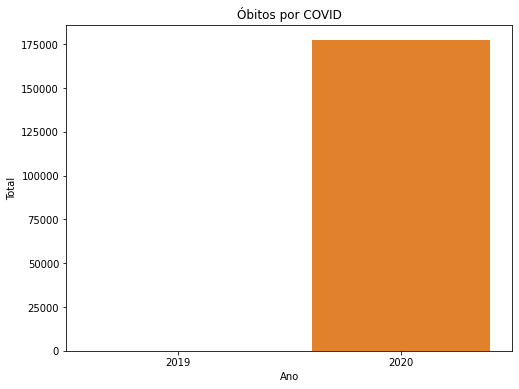

,Total,Ano
0,1,2019
1,177299,2020


In [19]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby("tipo_doenca").sum()
    total_2020 = dados_2020.groupby("tipo_doenca").sum()
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]

    dados = pd.DataFrame({"Total": lista,
                            "Ano": [2019, 2020]})

    plt.figure(figsize = (8,6))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa}")
    plt.show()
    

    return dados

grafico_comparativo("COVID")

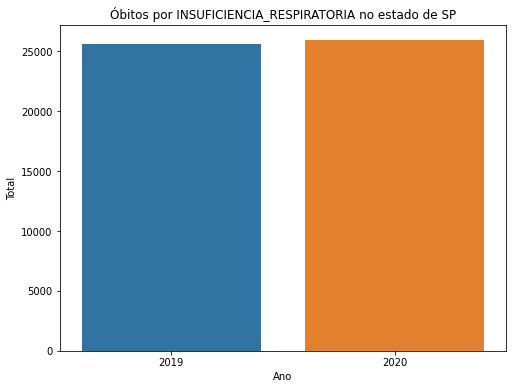

,Total,Ano
0,25612,2019
1,25932,2020


In [20]:
def grafico_comparativo(causa, estado):
    total_2019 = dados_2019.groupby(["uf","tipo_doenca"]).sum()
    total_2020 = dados_2020.groupby(["uf","tipo_doenca"]).sum()
    lista = [int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]

    dados = pd.DataFrame({"Total": lista,
                            "Ano": [2019, 2020]})

    plt.figure(figsize = (8,6))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa} no estado de {estado}")
    plt.show()
    

    return dados

grafico_comparativo("INSUFICIENCIA_RESPIRATORIA", "SP")

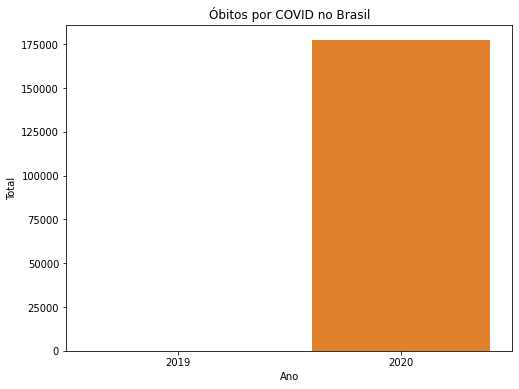

,Total,Ano
0,1,2019
1,177299,2020


In [22]:
def grafico_comparativo(causa, estado="BRASIL"):
    
    if estado == "BRASIL":
        total_2019 = dados_2019.groupby("tipo_doenca").sum()
        total_2020 = dados_2020.groupby("tipo_doenca").sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]

        dados = pd.DataFrame({"Total": lista,
                                "Ano": [2019, 2020]})

        plt.figure(figsize = (8,6))
        sns.barplot(x = "Ano", y = "Total", data = dados)
        plt.title(f"Óbitos por {causa} no Brasil")
        plt.show()
        

        return dados

    else:

        total_2019 = dados_2019.groupby(["uf","tipo_doenca"]).sum()
        total_2020 = dados_2020.groupby(["uf","tipo_doenca"]).sum()
        lista = [int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]

        dados = pd.DataFrame({"Total": lista,
                                "Ano": [2019, 2020]})

        plt.figure(figsize = (8,6))
        sns.barplot(x = "Ano", y = "Total", data = dados)
        plt.title(f"Óbitos por {causa} no estado de {estado}")
        plt.show()
        

        return dados

grafico_comparativo("COVID")